Load Data

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("../climate_data.db")
df = pd.read_sql_query("SELECT * FROM avg_temperatures_cleaned", conn)
conn.close()

print(df.head())
print(df.info())


     City  Year  AvgMaxTemp
0  Zurich  2014       14.83
1  Zurich  2015       14.78
2  Zurich  2016       13.97
3  Zurich  2017       14.46
4  Zurich  2018       15.89
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        60 non-null     object 
 1   Year        60 non-null     int64  
 2   AvgMaxTemp  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
None


Line Plots Seaborn

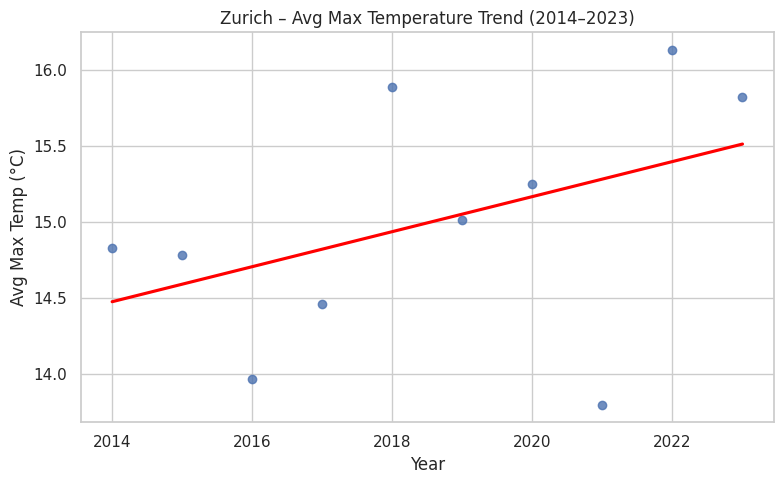

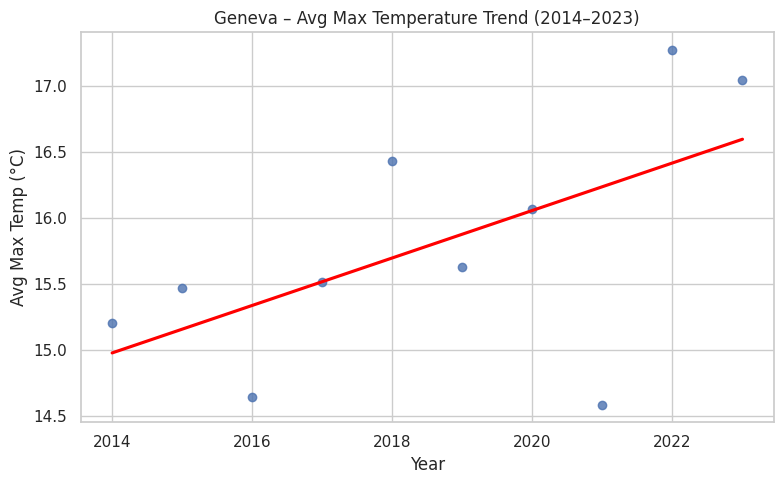

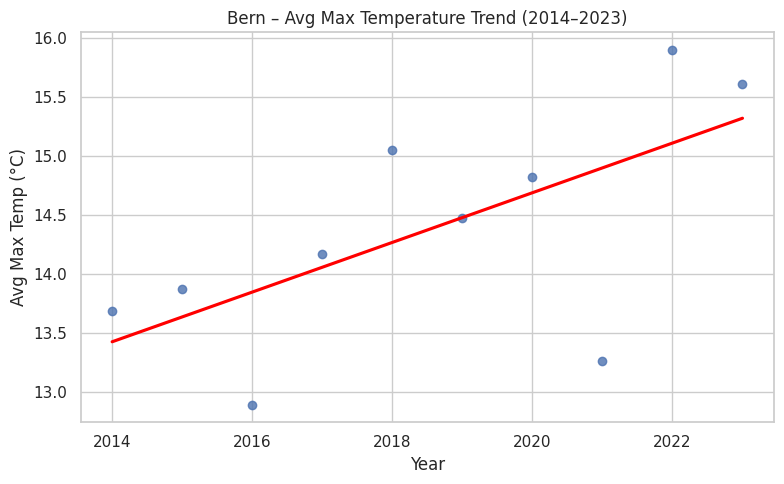

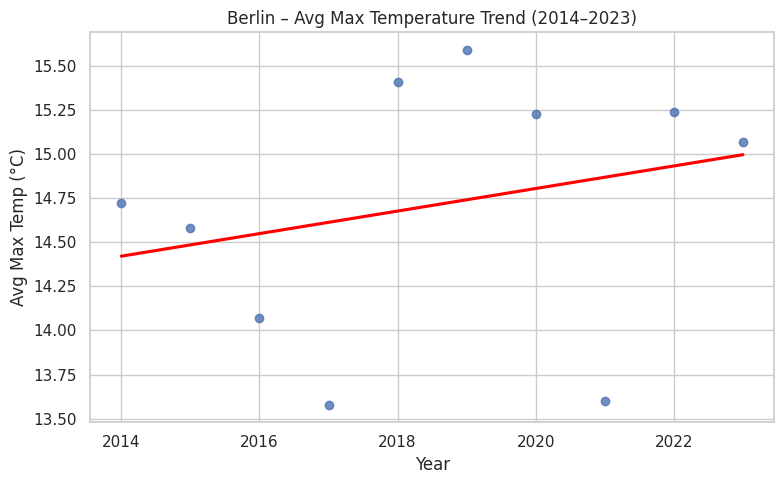

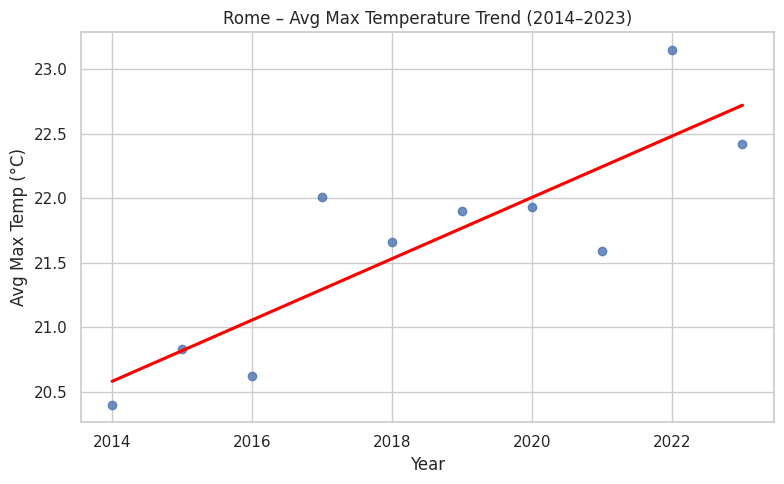

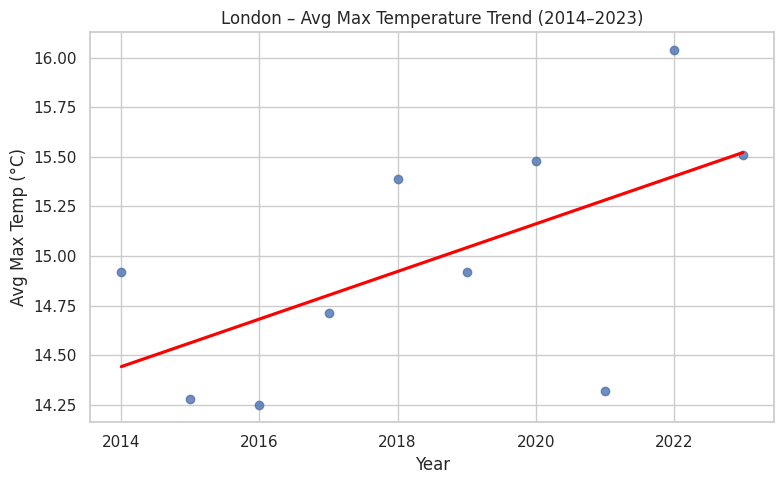

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot each city’s trend
for city in df["City"].unique():
    df_city = df[df["City"] == city]

    plt.figure(figsize=(8, 5))
    sns.regplot(data=df_city, x="Year", y="AvgMaxTemp", ci=None, marker="o", line_kws={"color": "red"})
    plt.title(f"{city} – Avg Max Temperature Trend (2014–2023)")
    plt.xlabel("Year")
    plt.ylabel("Avg Max Temp (°C)")
    plt.tight_layout()
    plt.show()


All citites in one plot

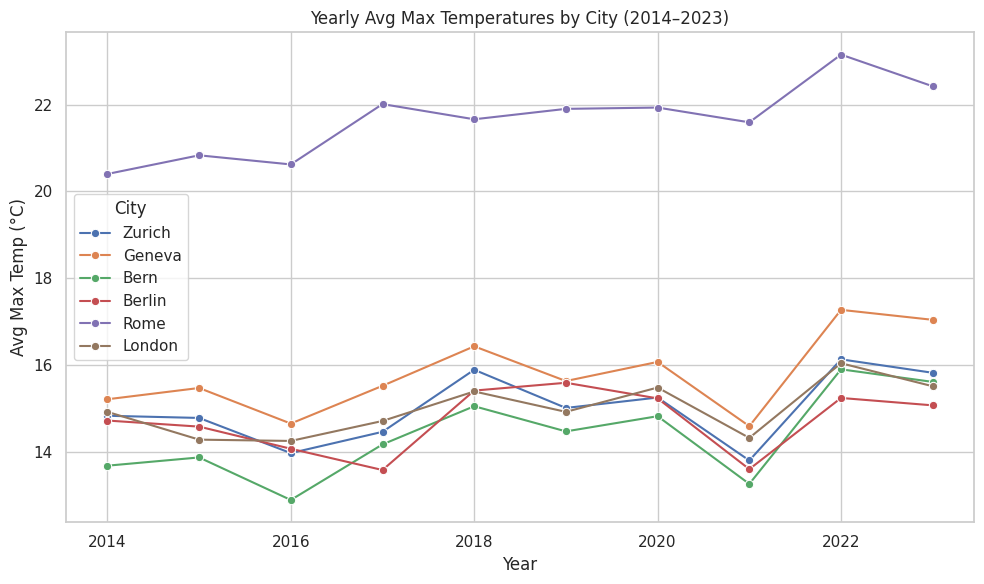

In [3]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="AvgMaxTemp", hue="City", marker="o")
plt.title("Yearly Avg Max Temperatures by City (2014–2023)")
plt.xlabel("Year")
plt.ylabel("Avg Max Temp (°C)")
plt.legend(title="City")
plt.tight_layout()
plt.show()


Grid Layout of all cities

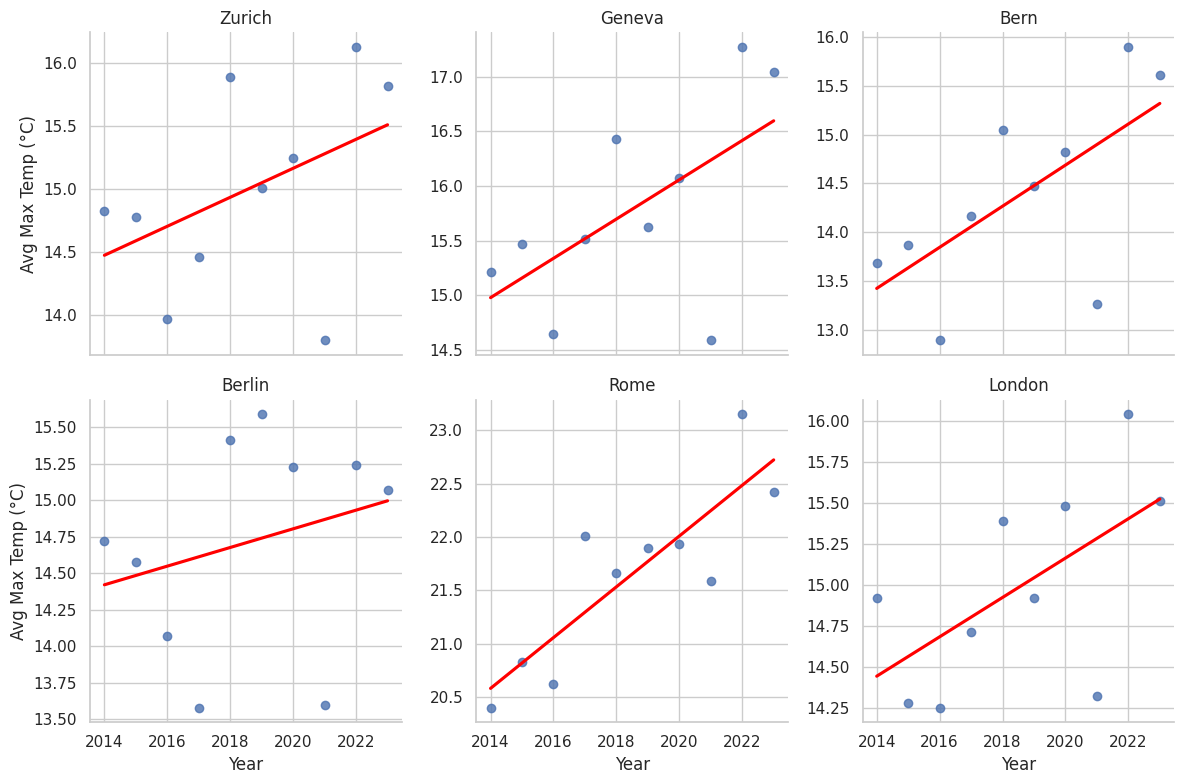

In [4]:
g = sns.FacetGrid(df, col="City", col_wrap=3, height=4, sharey=False)
g.map(sns.regplot, "Year", "AvgMaxTemp", ci=None, marker="o", line_kws={"color": "red"})
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Avg Max Temp (°C)")
plt.tight_layout()
plt.show()


Heatmap

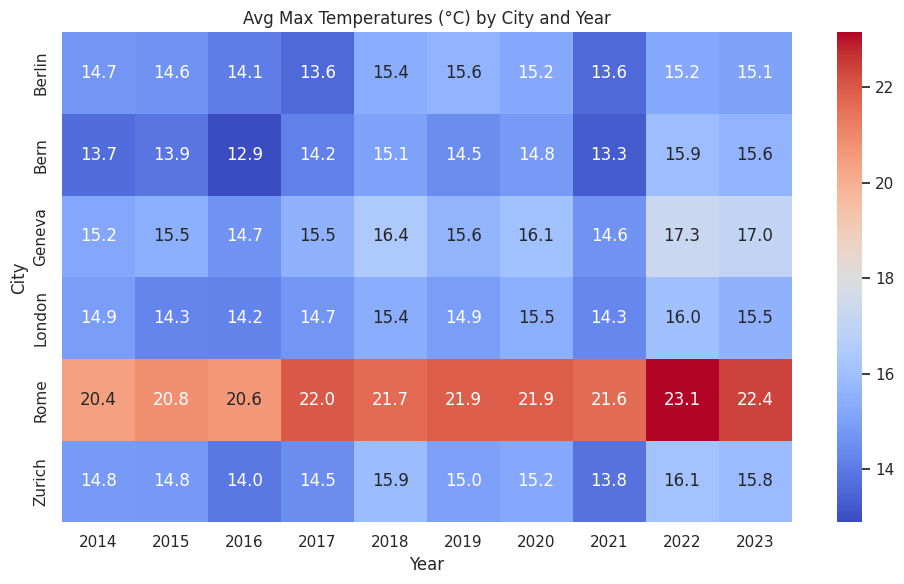

In [5]:
pivot = df.pivot(index="City", columns="Year", values="AvgMaxTemp")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Avg Max Temperatures (°C) by City and Year")
plt.xlabel("Year")
plt.ylabel("City")
plt.tight_layout()
plt.show()

Bar Plot - Avergage Temp per City over 10 years

/tmp/ipykernel_89315/703999626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_avg, x="AvgMaxTemp", y="City", palette="viridis")


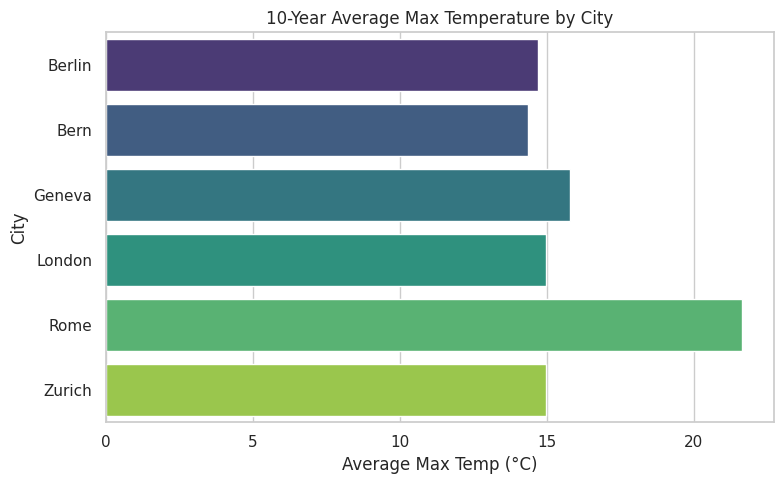

In [6]:
city_avg = df.groupby("City")["AvgMaxTemp"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=city_avg, x="AvgMaxTemp", y="City", palette="viridis")
plt.title("10-Year Average Max Temperature by City")
plt.xlabel("Average Max Temp (°C)")
plt.ylabel("City")
plt.tight_layout()
plt.show()


Boxplot - Temperature Distribution per City

/tmp/ipykernel_89315/2071817672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="City", y="AvgMaxTemp", palette="Set2")


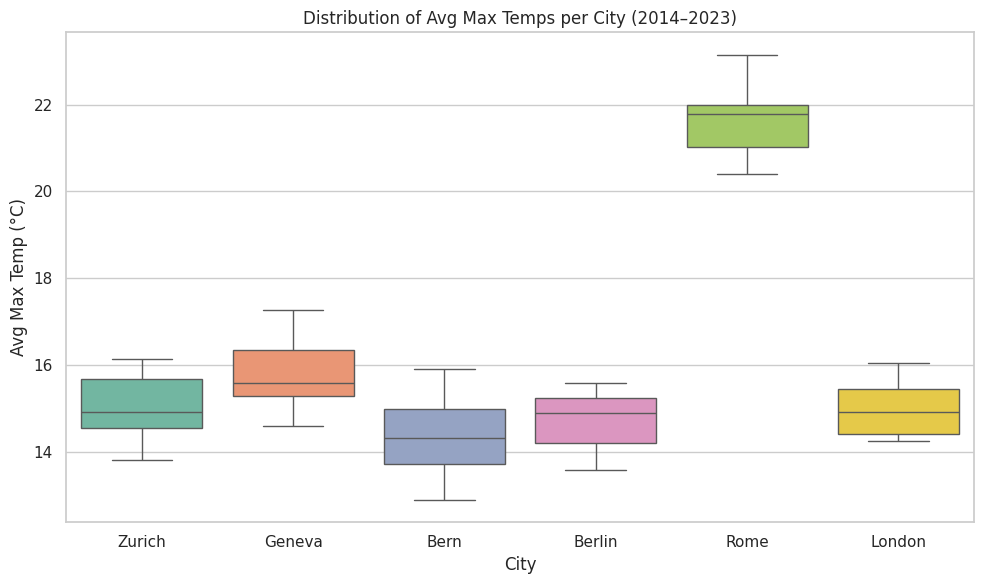

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="City", y="AvgMaxTemp", palette="Set2")
plt.title("Distribution of Avg Max Temps per City (2014–2023)")
plt.xlabel("City")
plt.ylabel("Avg Max Temp (°C)")
plt.tight_layout()
plt.show()


T-Test comparision between two Cities

T-test: Zurich vs. Rome
  t-statistic = -18.17
  p-value = 0.0000


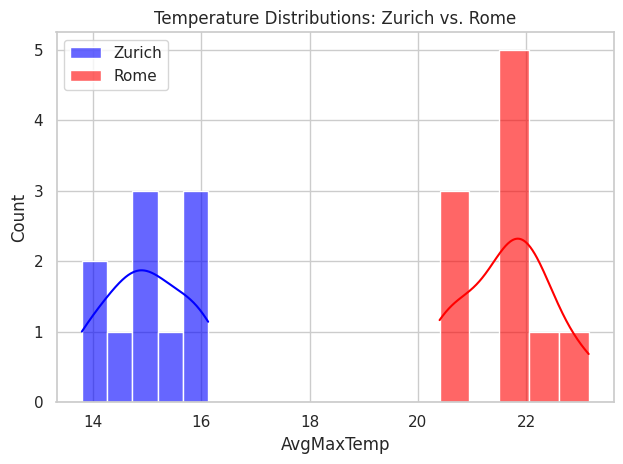

In [8]:
from scipy.stats import ttest_ind

c1 = "Zurich"
c2 = "Rome"

t1 = df[df["City"] == c1]["AvgMaxTemp"]
t2 = df[df["City"] == c2]["AvgMaxTemp"]

t_stat, p = ttest_ind(t1, t2)

print(f"T-test: {c1} vs. {c2}")
print(f"  t-statistic = {t_stat:.2f}")
print(f"  p-value = {p:.4f}")

sns.histplot(t1, kde=True, label=c1, color="blue", alpha=0.6)
sns.histplot(t2, kde=True, label=c2, color="red", alpha=0.6)
plt.title(f"Temperature Distributions: {c1} vs. {c2}")
plt.legend()
plt.tight_layout()
plt.show()
